
Model Evaluation:
Accuracy: 0.7532467532467533

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



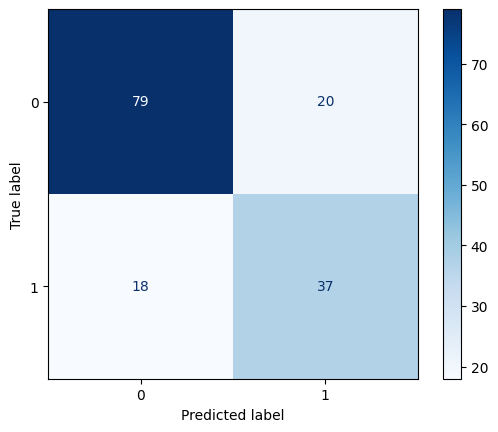


Please enter the patient's data for prediction:
Enter number of Pregnancies: 5
Enter Glucose level: 180
Enter Blood Pressure: 80
Enter Skin Thickness: 35
Enter Insulin level: 150
Enter BMI: 35.0
Enter Diabetes Pedigree Function: 1.2
Enter Age: 50

The model predicts that the patient has diabetes.


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=column_names)

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

def get_user_input():
    print("\nPlease enter the patient's data for prediction:")

    Pregnancies = float(input("Enter number of Pregnancies: "))
    Glucose = float(input("Enter Glucose level: "))
    BloodPressure = float(input("Enter Blood Pressure: "))
    SkinThickness = float(input("Enter Skin Thickness: "))
    Insulin = float(input("Enter Insulin level: "))
    BMI = float(input("Enter BMI: "))
    DiabetesPedigreeFunction = float(input("Enter Diabetes Pedigree Function: "))
    Age = float(input("Enter Age: "))

    new_patient_data = np.array([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]])

    return new_patient_data

new_patient_data = get_user_input()

new_patient_data_scaled = scaler.transform(new_patient_data)

new_prediction = model.predict(new_patient_data_scaled)

if new_prediction[0] == 1:
    print("\nThe model predicts that the patient has diabetes.")
else:
    print("\nThe model predicts that the patient does not have diabetes.")
